In [1]:
import numpy as np
import tifffile as tiff
import cv2
import os
import sys
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# sys.exit(0)

## Main code

### Data read and display

#### functions

In [2]:
def display_video(video):
    num_frames, height, width = video.shape
    print(f"the frame number is {num_frames};\n"
        f"the height is {height};\n"
        f"the width is {width}.")

    # Start the timer
    start_time = time.time()

    # Iterate over each frame and display the corresponding image
    for i in range(num_frames):
        # Clear the previous output
        clear_output(wait=True)

        # Create a new figure and axis for displaying the image
        fig, ax = plt.subplots(figsize=(13, 8))

        # Display the image from the current frame
        ax.imshow(video[i], cmap='gray') # map to 0 to 1 for images

        # Remove the axis ticks and labels for cleaner visualization
        ax.axis('off')

        # Show the plot
        plt.show()

        # Wait for a short duration (e.g., 0.1 seconds) to mimic video playback
        time.sleep(0.002)

    # End the timer
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Print the elapsed time
    print(f"Elapsed time: {elapsed_time} seconds")


def display_image(image):
    fig, ax = plt.subplots(figsize=(13, 8))
    image = ax.imshow(image, cmap='gray') # map to 0 to 1 for images
    gray_matrix = image.get_array()
    ax.axis('off')
    plt.show()
    return gray_matrix.compressed()

#### code

In [3]:
# read all kinds of data: green, green cleaned, red, red clean

folder_path = './Fluorescence_Data'
# file_list = os.listdir(folder_path)

green = 'Green_demonsreg_demonsreg/CL090_230515_004_reg_f00000_greendemonsreg1demonsreg2.tif'
green_clean = 'Green_demonsreg_demonsreg_cleaned3/CL090_230515_004_reg_f00000_greendemonsreg1demonsreg2_cleaned3.tif'
red = 'Red_demonsreg_demonsreg/CL090_230515_004_reg_f00000_reddemonsreg1demonsreg2.tif'
red_clean = 'Red_demonsreg_demonsreg_cleaned3/CL090_230515_004_reg_f00000_reddemonsreg1demonsreg2_cleaned3.tif'

file_path_green = os.path.join(folder_path, green)
file_path_green_clean = os.path.join(folder_path, green_clean)
file_path_red = os.path.join(folder_path, red)
file_path_red_clean = os.path.join(folder_path, red_clean)

video_green = tiff.imread(file_path_green)
video_green_clean = tiff.imread(file_path_green_clean)
video_red = tiff.imread(file_path_red)
video_red_clean = tiff.imread(file_path_red_clean)

videos = [video_green, video_green_clean, video_red, video_red_clean]

for video in videos:
    print('--- * ---')
    print(type(video))
    print(video.shape)
    # print(video[0])
    print(np.min(video), np.max(video))
    print('--- * ---')

--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 58838
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 45714
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 53928
--- * ---
--- * ---
<class 'numpy.ndarray'>
(500, 512, 796)
0 30201
--- * ---


In [4]:
# read multiple pieces of green data and concatenate them

folder_path = './Fluorescence_Data'

green_folder = 'Green_demonsreg_demonsreg'
green_clean_folder = 'Green_demonsreg_demonsreg_cleaned3'
red_folder = 'Red_demonsreg_demonsreg'
red_clean_folder = 'Red_demonsreg_demonsreg_cleaned3'

file_path_green_folder = os.path.join(folder_path, green_folder)
file_path_green_clean_folder = os.path.join(folder_path, green_clean_folder)
file_path_red_folder = os.path.join(folder_path, red_folder)
file_path_red_clean_folder = os.path.join(folder_path, red_clean_folder)

# Get the list of all files in the folder
files = os.listdir(file_path_red_folder)

prefix_string = 'CL090_230515_004'
include_string = 'red'
exclude_string_1 = 'green'
exclude_string_2 = 'clean'

# Filter the files based on the given conditions
filtered_files = [
    file for file in files if (
        file.startswith(prefix_string) and
        include_string in file and
        exclude_string_1 not in file and
        exclude_string_2 not in file
    )
]

# # Print the filtered file names
# for file in filtered_files:
#     print(file)

# print("--- * --- * ---")

ordered_files = sorted(filtered_files, key=lambda x: int(x.split("_")[4][1:]))

# # Print the ordered file names
# for file in ordered_files:
#     print(file)

videos = [
    tiff.imread(os.path.join(file_path_red_folder, file_name))
    for file_name in ordered_files[:10]
]

concatenated_videos = np.concatenate(videos, axis=0)
print(concatenated_videos.shape)

(5000, 512, 796)


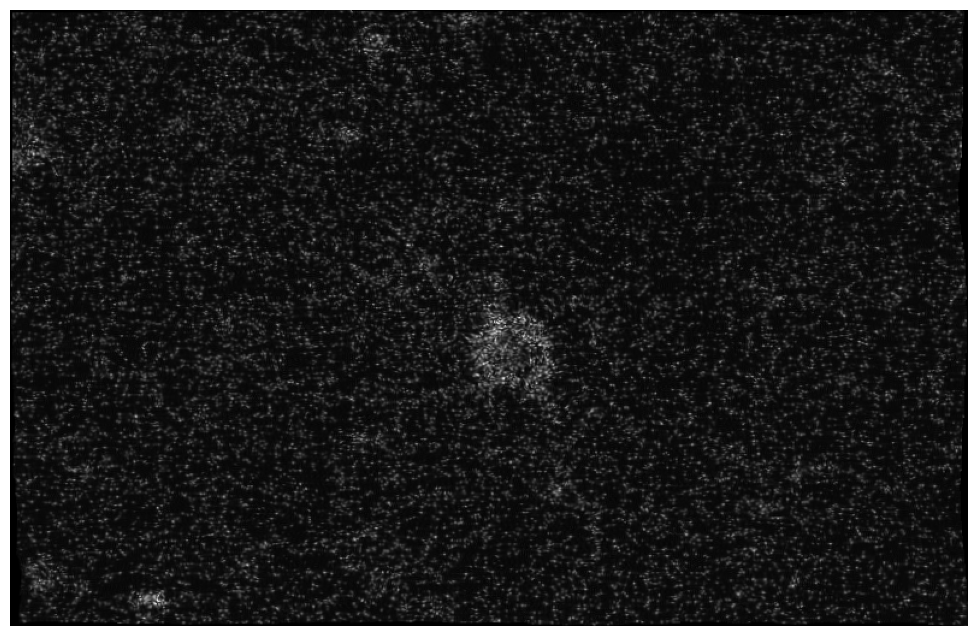

Elapsed time: 7.28446626663208 seconds


In [5]:
# video = video_green
video = concatenated_videos[:30]

display_video(video)

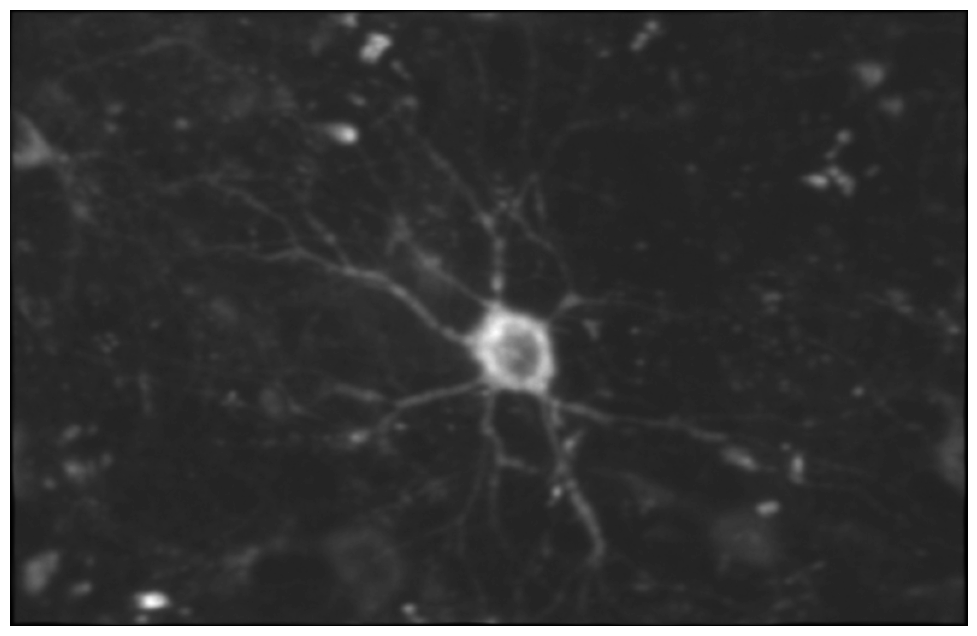

<class 'numpy.ndarray'>
64640207 9733
64640207 9733


In [6]:
video = concatenated_videos

# Sum along axis 0
sum_axis0 = np.sum(video, axis=0)
gray_matrix = display_image(sum_axis0)
print(type(gray_matrix))
print(np.max(gray_matrix), np.min(gray_matrix))
print(np.max(sum_axis0), np.min(sum_axis0))

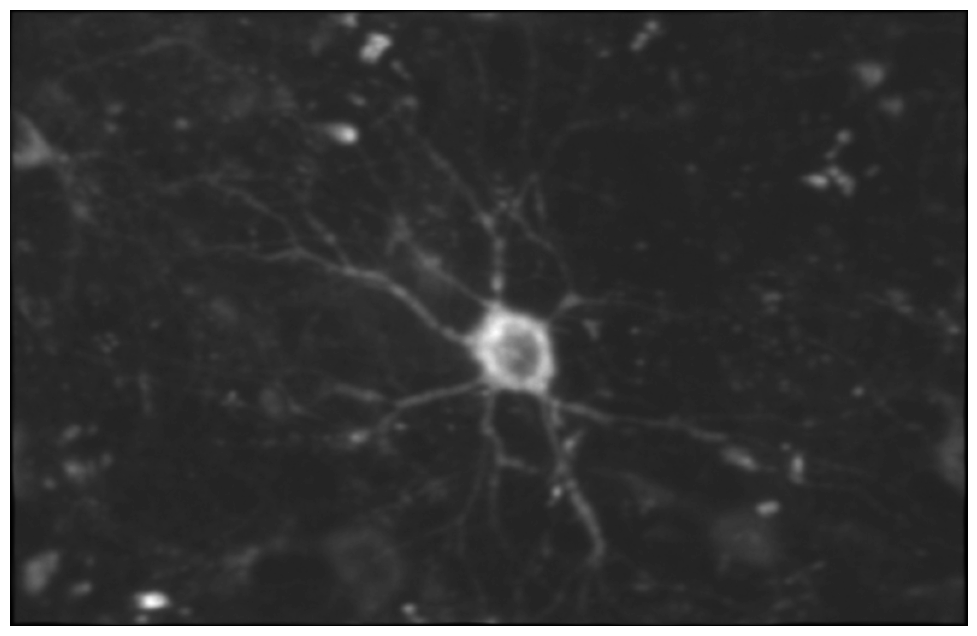

<class 'numpy.ndarray'>


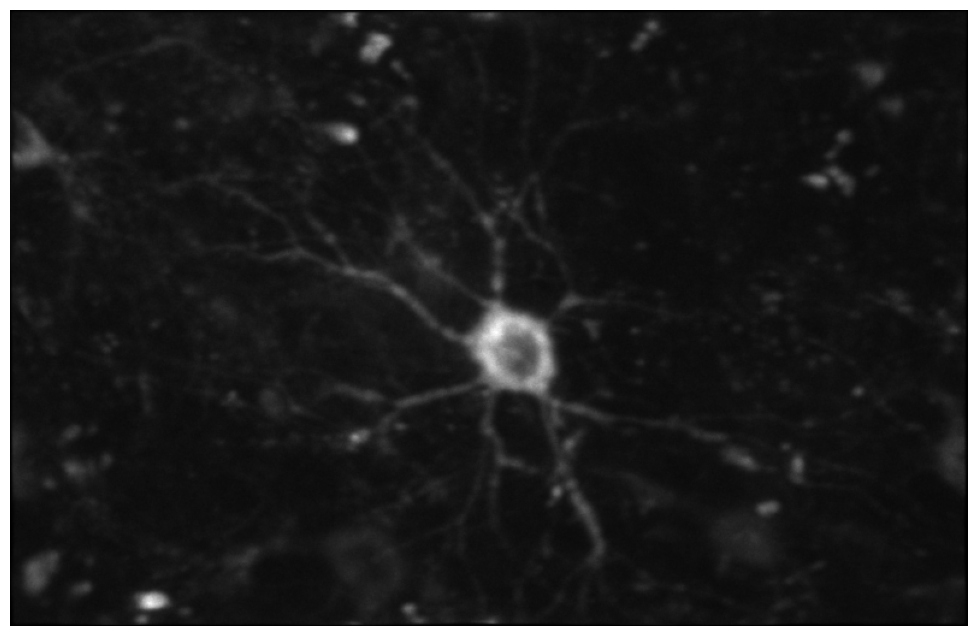

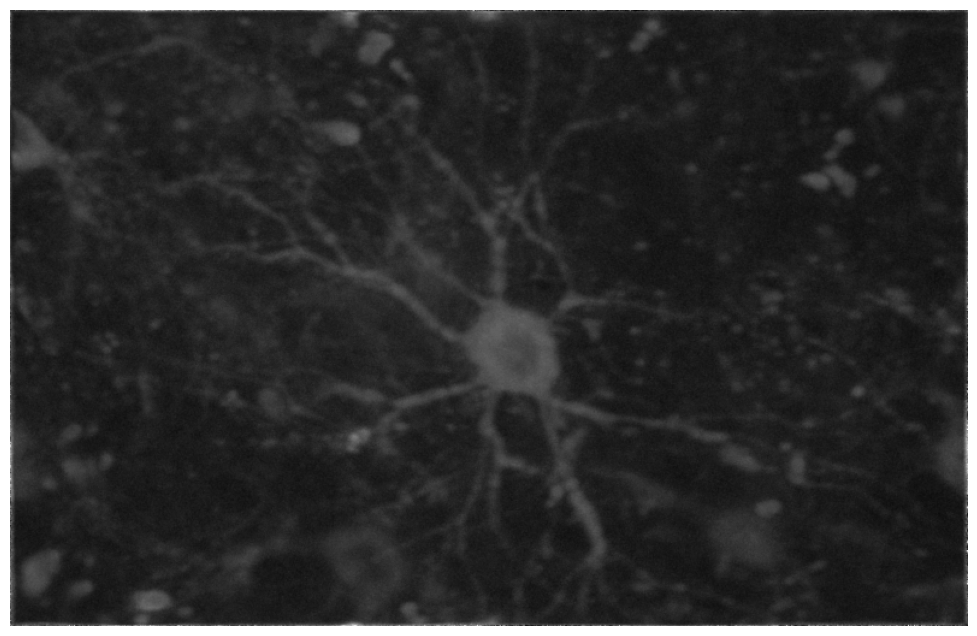

array([0.5093949 , 0.40058743, 0.3999224 , ..., 0.48501418, 0.384705  ,
       0.29696938])

In [7]:
video = concatenated_videos

# Sum along axis 0
sum_axis0 = np.sum(video, axis=0)
gray_matrix = display_image(sum_axis0)
print(type(gray_matrix))

# Var along axis 0
var_axis0 = np.var(video, axis=0)
display_image(var_axis0)

rate_axis0 = var_axis0 / sum_axis0
display_image(rate_axis0)

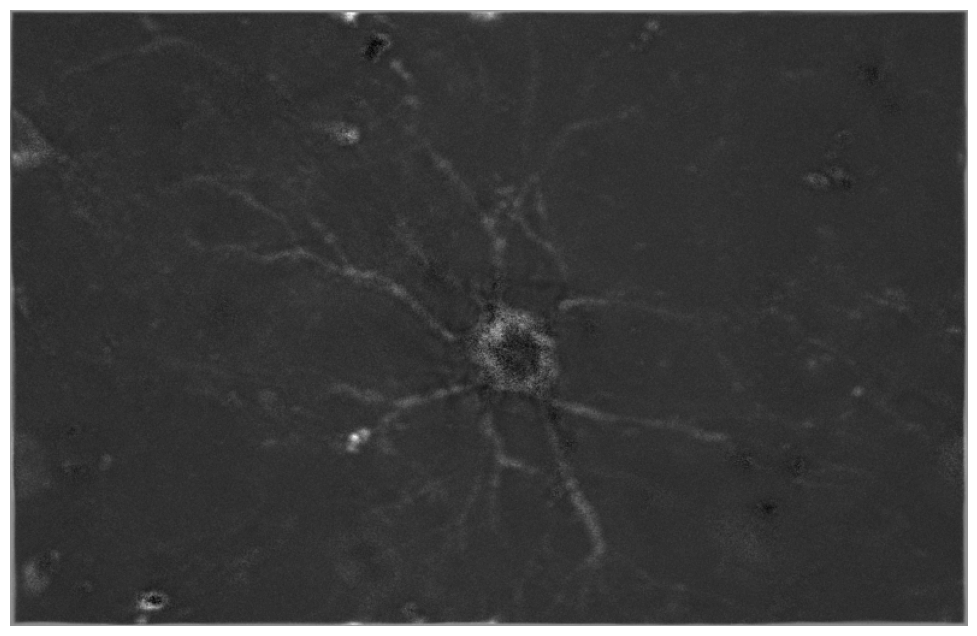

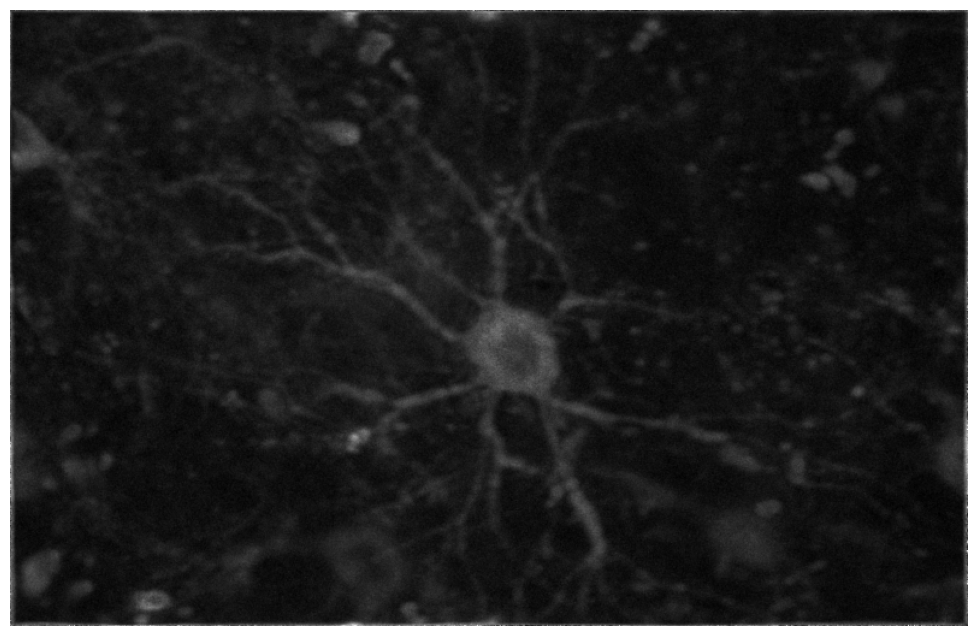

array([0.3246963 , 0.25434988, 0.25315633, ..., 0.30902393, 0.24527731,
       0.18937451])

In [15]:
var_axis0_norm = var_axis0 / np.max(np.abs(var_axis0))
sum_axis0_norm = sum_axis0 / np.max(np.abs(sum_axis0))
sum2_axis0_norm =  - sum_axis0_norm + var_axis0_norm
display_image(sum2_axis0_norm)

rate_axis0_norm = rate_axis0 / np.max(np.abs(rate_axis0))
sum3_axis0_norm =  - sum_axis0_norm + var_axis0_norm + rate_axis0_norm
display_image(sum3_axis0_norm)

video.shape: (2500, 512, 796)
max_value: 59601
min_value: 0


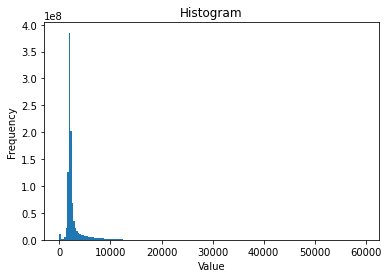

sum_axis0.shape: (512, 796)


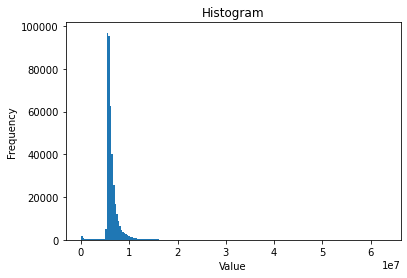

In [ ]:
video = concatenated_videos
print("video.shape:", video.shape)

# Calculate the maximum and minimum values
max_value = np.max(video)
min_value = np.min(video)
print("max_value:", max_value)
print("min_value:", min_value)

# Create an array of bin edges
infinitesimal = np.finfo(float).eps
bins = np.linspace(min_value-infinitesimal, max_value+infinitesimal, num=201)
# bin with x length means x-1 intervals for histogram

# Flatten the 3D matrix into a 1D array
flattened_data = video.flatten()

# Plot the histogram
plt.hist(flattened_data, bins=bins)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()


# Sum along axis 0
sum_axis0 = np.sum(video, axis=0)
print("sum_axis0.shape:", sum_axis0.shape)

plt.figure()
max_value = np.max(sum_axis0)
min_value = np.min(sum_axis0)
infinitesimal = np.finfo(float).eps
bins = np.linspace(min_value-infinitesimal, max_value+infinitesimal, num=201)
flattened_data = sum_axis0.flatten()
hist_values, bin_edges, _ =plt.hist(flattened_data, bins=bins)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()
# print("Bin Edges:", bin_edges)
# print("Histogram Values:", hist_values)

In [ ]:
# threshold = 1.00055924e+06*2

# sum_axis0_new = np.where(sum_axis0 > threshold, 1, 0)

# fig, ax = plt.subplots()
# ax.imshow(sum_axis0_new, cmap='gray') # map to 0 to 1 for images
# ax.axis('off')
# plt.show()


# # Apply Gaussian blur to reduce noise (optional but recommended)
# blurred_image = cv2.GaussianBlur(sum_axis0, (3, 3), 0)

# threshold1 = 100
# threshold2 = 150

# # Apply Canny edge detection
# edges = cv2.Canny(blurred_image, threshold1, threshold2)

# # Display the original image and the detected edges
# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(x, cmap='gray')
# ax1.set_title('Gray Image')
# ax1.axis('off')

# ax2.imshow(edges, cmap='gray')
# ax2.set_title('Detected Edges')
# ax2.axis('off')

# plt.show()